# Plot Apparent Competition

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from group_w_pop_funs import update_params
from local_stability_funs import get_apparent_competition, get_apparent_competition2
from bif_diagram_funs import get_coexistence_equilibria, make_equilibria_dataframe, get_bif_input
from sim_graph_funs import format_ax, param_lab_dic, mean_x_lab
import matplotlib.colors as mcolors


** I did N2 vs N1, but I need to do N1 vs N2!!! **

In [39]:
def plot_apparent_competition(param_key, param_vec, params_base, num_init = 20, num_perturbations = 4,
                              perturb_strength = .01, t_f = 1500):
    rows_co = get_coexistence_equilibria(
        param_key, param_vec,
        num_init, num_perturbations, perturb_strength, t_f = t_f,
        **params_base)
    x_max = params_base['x_max']
    df = make_equilibria_dataframe(rows_co, param_key, x_max)
    equilibrium_mat = df.iloc[:, 1:3+x_max].to_numpy()
    apparent_comp_array1 = np.zeros(len(df))
    apparent_comp_array2 = np.zeros(len(df))
    
    for i, row in enumerate(equilibrium_mat):
        params = update_params(param_key=param_key, param = df[param_key][i], params_base=params_base)
        [N1,N2,*gvec] = row
        apparent_comp_array1[i] = get_apparent_competition(N1,N2,gvec,**params)
        apparent_comp_array2[i] = get_apparent_competition2(N1,N2,gvec,**params)


    fig1, ax1 = plt.subplots(1,1)
    fig2, ax2 = plt.subplots(1,1)

    df['apparent_competition1'] = apparent_comp_array1
    df['apparent_competition2'] = apparent_comp_array2
    
    stable_markers = dict(label = "Stable ", marker = "o", s = 5)
    unstable_markers = dict(label = "Unstable ", marker = 'D', 
                            s = 30, facecolors='none')
    marker_map = {
        'Stable (attractive)': stable_markers,    # Filled circle
        'Unstable': unstable_markers   # Open diamond
    }
    for y_col_name, ax in zip(['apparent_competition1', 'apparent_competition2'], [ax1,ax2]):
        for (stability,), group in df.groupby(['stability']):
            filtered_group = group[(group['p'] > 0) & (group['N1'] > 0) & (group['N2'] > 0)]
        
            if not filtered_group.empty:  # Only plot if there are remaining points
                color = 'k'
                marker_dict = marker_map.get(stability, dict(label="Unknown", marker="x", s=10))  
                ax.scatter(
                    filtered_group[param_key], filtered_group[y_col_name],
                    color=color, **marker_dict
                )
        ax.axhline(0,color='blue')
        
    #ax.scatter(df[param_key], apparent_comp_array)
    format_ax(ax=ax1, xlab=param_lab_dic[param_key],
          ylab = "Apparent Competition,\n" + r'$N_1 \to N_2, \partial N_2/\partial N_1$', if_legend = True)
    format_ax(ax=ax2, xlab=param_lab_dic[param_key],
          ylab = "Apparent Competition,\n" + r'$N_2 \to N_1, \partial N_1/\partial N_2$', if_legend = True)

    return fig1, fig2




In [36]:
make_equilibria_dataframe?

Signature: make_equilibria_dataframe(rows, param_key, x_max)
Docstring: <no docstring>
File:      ~/Documents/CH_GroupFormation/CH_code/Functions/bif_diagram_funs.py
Type:      function

# Type I

## Vary big prey benefit

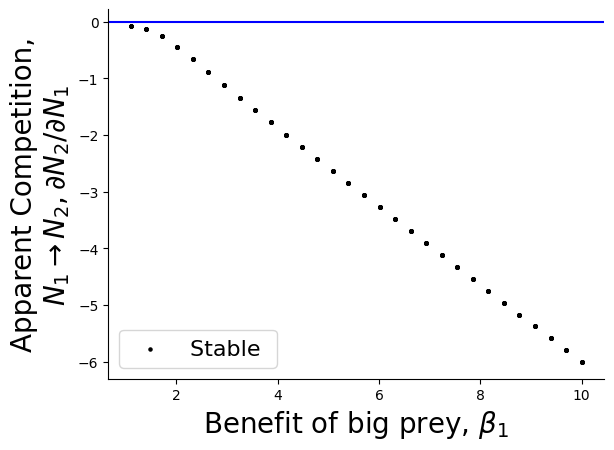

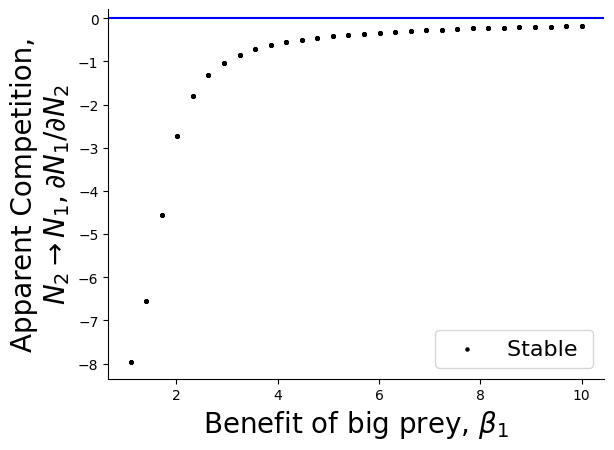

In [40]:
param_vec = np.linspace(1.1,10,30)
param_key = 'β1'
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A1 = 0.5, A2 = 0.5,
                   β1 = 8, β2 = 1, H1a = 0, H2a = 0, H1b=H, H2b=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base, num_init = 20, num_perturbations = 4,
                              perturb_strength = .01, t_f = 1500)

## Type I, $\eta_1, \beta_1$ scaled

In [21]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10, 
                 Tx = .01, scale = 5, pop_process = True)

/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates


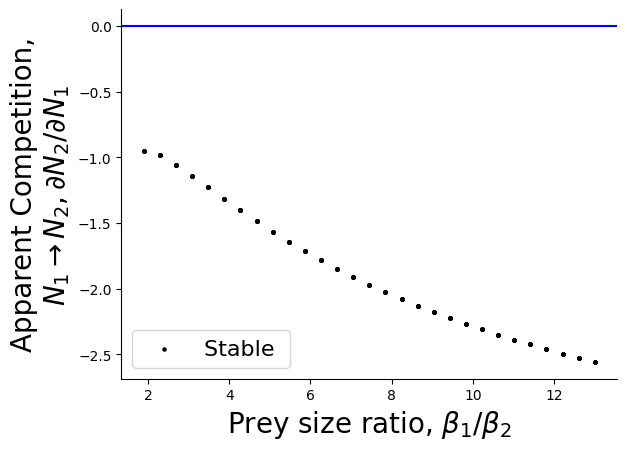

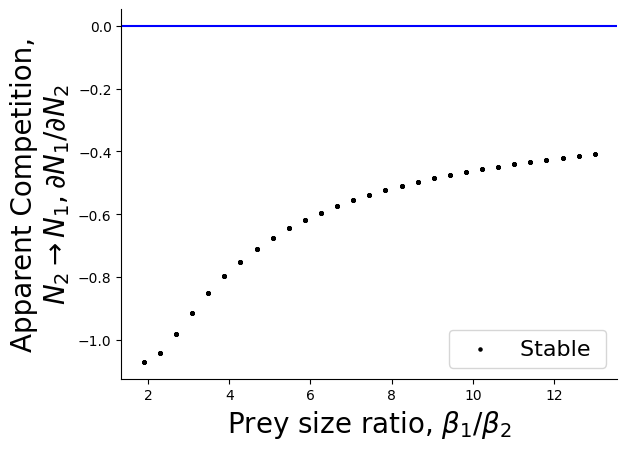

In [22]:
param_key = 'scale'; param_vec = np.linspace(1.5,13,30);

fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base, num_init = 20, num_perturbations = 4,
                              perturb_strength = .01, t_f = 1500)

# Type II

In [42]:
H = 2
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A1 = 0.5, A2 = 0.5, 
                   β1 = 8, β2 = 1, 
                   H1a = 0, H1b=H, H2a = 0, H2b=H, 
                   α1_of_1=0.05, α2_of_1=0.95, 
                   s1=2, s2=2, α2_fun_type = 'constant',
                   x_max = x_max, d = 10,
                   Tx = .01, pop_process = True)


# Type II, Vary Prey Growth

(-200.0, 150.0)

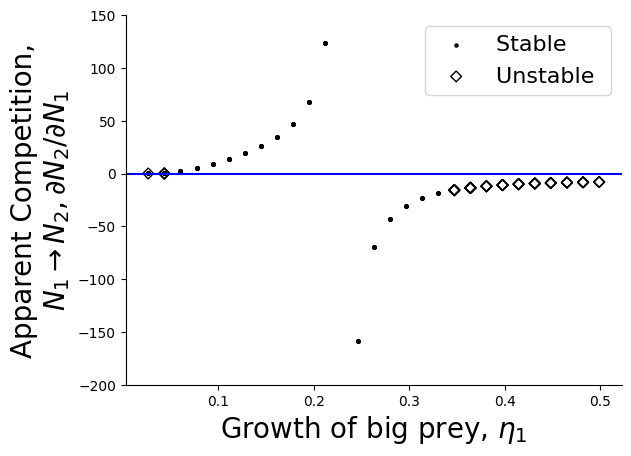

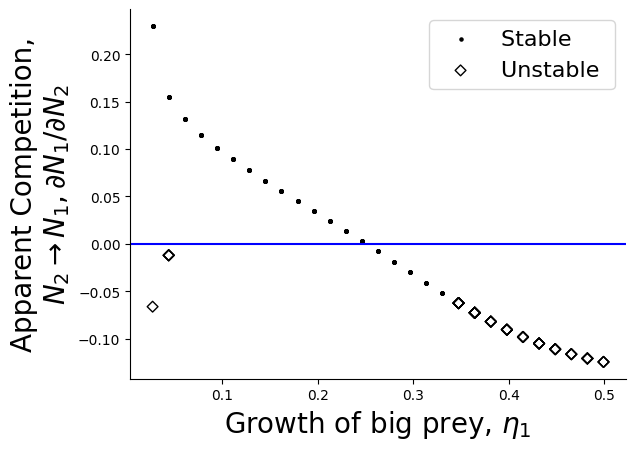

In [44]:
param_vec = np.linspace(0.01,params_base['η2']-0.001,30)
param_key= 'η1'
fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base)
fig1.axes[0].set_ylim([-200,150])

# Type II, $H_1$, $\beta_1$, $\eta_1$ scaled, vary scale

In [45]:
H = 1
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,scale = 1.5,
                 Tx = .01, pop_process = True)
params_base = update_params(params_base = params_base, param_key = 'scale', param = 1.5)

/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates


(-8.0, 5.0)

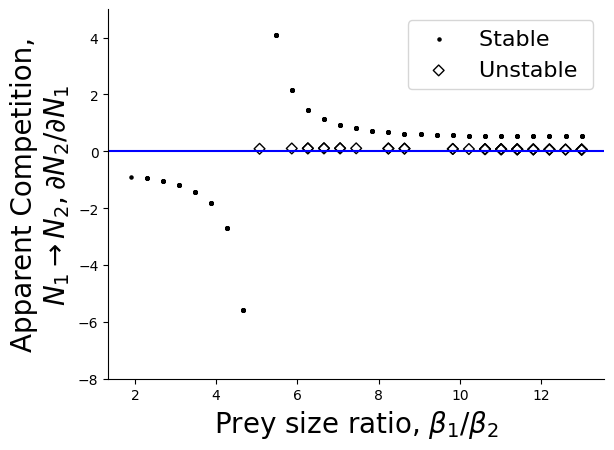

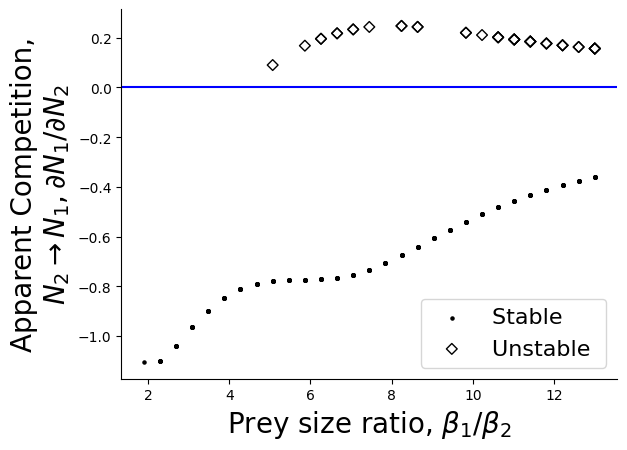

In [46]:
param_key = 'scale'; param_vec = np.linspace(1.5,13,30);
fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base)
fig1.axes[0].set_ylim([-8,5])

**Notes:**

For a large mass ratio of big prey to small prey ($>$ about 5.5), there is asymmetric apparent competition between big and small prey; small prey population growth hurts big prey ($\partial N_1/\partial N_2 < 0$), but big prey population growth helps small prey ($\partial N_2/ \partial N_1 > 0$)

# Type II, Scaled, Vary $\eta_2$

Since $\eta_1 = \eta_2/(\beta_1/\beta_2) = \eta_2/4$, and we must have $\eta_1 + \eta_2 < 1$, then $((B+1)/B)\eta_2 < 1$ so $\eta_2 < B/(B+1)$, where $B = \beta_1/\beta_2$

In [47]:
H = 1
x_max = 5
scale = 6
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True, scale = 6)
params = update_params(param_key = "scale", param=scale, params_base=params_base)

/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates


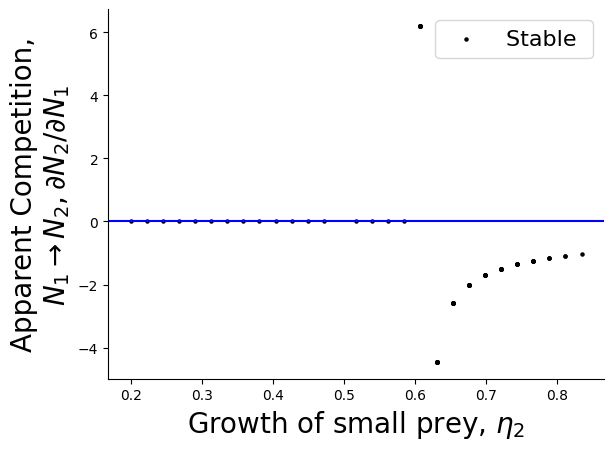

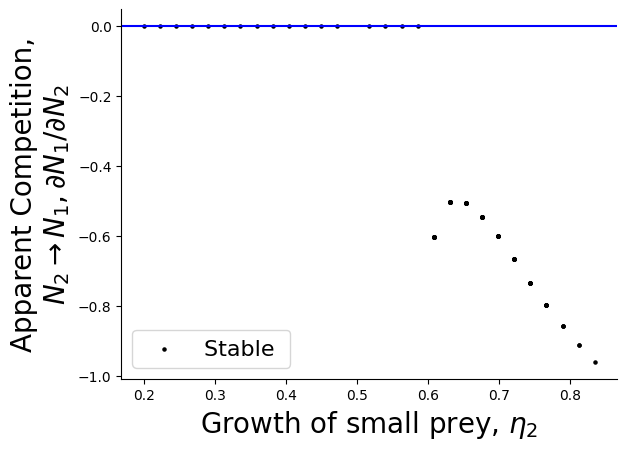

In [48]:

param_key = 'η2'

param_vec = np.linspace(0.2,scale/(scale + 1),30)
fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base)


# Vary Attack Rate

In [49]:
H = 1
x_max = 5
scale = 6
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=H, H2a = 0, H2b = H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True, scale = 6)
params = update_params(param_key = "scale", param=scale, params_base=params_base)

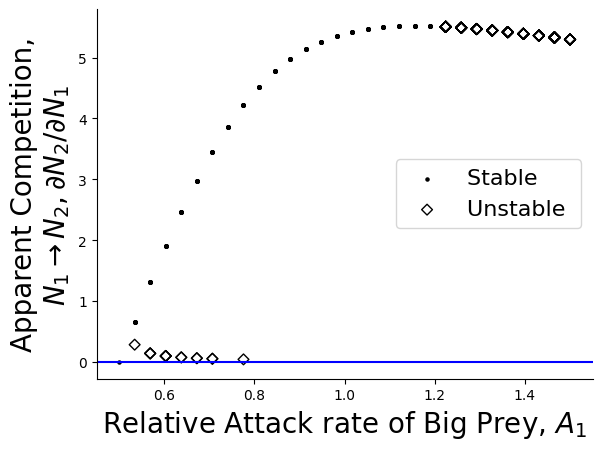

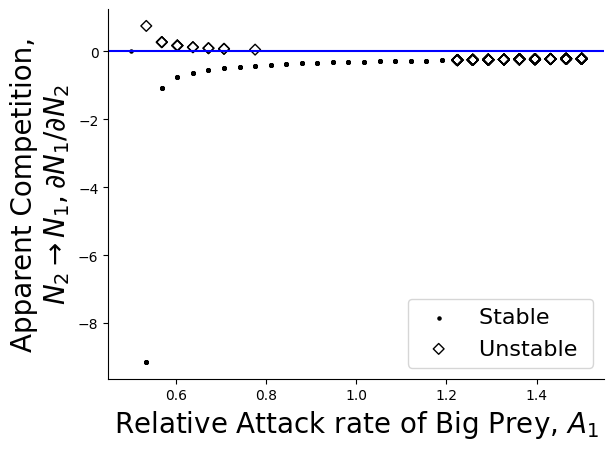

In [50]:
param_key = 'A1'

param_vec = np.linspace(0.5,1.5,30)
fig1, fig2 = plot_apparent_competition(param_key, param_vec, params_base)

If the attack rate on big prey is high ( for $\beta_1/\beta_2$ pretty high) we see that big prey experiences apparent competition from small prey, but the small prey population is facilitated by the presence of big prey!

**I should plot apparent competition of $A_1$ vs $\beta_1/\beta_2$. It will take a while. will have to parallelize**

DO $0.5 < A_1 < 1.5$ and $3 < \beta_1/\beta_2 < 8$

From the last two plots, we see that as conditions make hunting big prey more profitable, apparent competition between the two prey types becomes asymmetric, with a greater abundance of big prey helping small prey even though more small prey hurts big prey

**I should plot the coexistence mean experienced group size vs $A_1$ and $\beta_1/\beta_2$, making the plot empty if there is no stable coexistence equilibrium or cycle**

# Grid

In [81]:
def calc_apparent_comp_over_df(df, param_keys, params_base):
    x_max = params_base['x_max']
    equilibrium_mat = df.iloc[:, 1:3+x_max].to_numpy()
    apparent_comp_array1 = np.zeros(len(df))
    apparent_comp_array2 = np.zeros(len(df))
    
    for i, row in enumerate(equilibrium_mat):
        for param_key in param_keys:
            params = update_params(param_key=param_key, param = df[param_key][i], params_base=params_base)
        [N1,N2,*gvec] = row
        apparent_comp_array1[i] = get_apparent_competition(N1,N2,gvec,**params)
        apparent_comp_array2[i] = get_apparent_competition2(N1,N2,gvec,**params)



    df['apparent_competition1'] = apparent_comp_array1
    df['apparent_competition2'] = apparent_comp_array2

    return df

In [30]:
# Run in parallel
if __name__ == "__main__":
    from multiprocessing import Pool, cpu_count
    from bif_diagram_funs import run_bifurcation_A1_scale
    print('hi')
    scale_values = np.linspace(1, 10.0, 40)  # Example range for scale
    n_jobs = min(cpu_count(), len(scale_values))
    with Pool(n_jobs) as pool:
        results = pool.map(run_bifurcation_A1_scale, scale_values)
    
    # Combine all results into a single DataFrame
    final_df = pd.concat(results, ignore_index=True)
    
    # Save to CSV
    final_df.to_csv("bifurcation_results.csv", index=False)
    print("Saved to bifurcation_results.csv")

hi


/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates
/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates
/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:375: RuntimeWarning: invalid value encountered in divide
  u_ = y_/(b*y0) # find derivative of transformed coordinates
/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:372: RuntimeWarning: overflow encountered in exp
  y0 = a * np.exp(b*u0) # transform back into original coordinates
/Users/taliaborofsky/Documents/CH_GroupFormation/CH_code/Functions/group_w_pop_funs.py:86: RuntimeWarning: invalid value encountered in scalar add
  dgdT = (Q_x + birthsx + deaths

Saved to bifurcation_results.csv


In [87]:
df = pd.read_csv("bifurcation_results.csv")
params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=1, H2a = 0, H2b = 1, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = 5, d = 10,
                 Tx = .01, pop_process = True, scale = 6)
df = calc_apparent_comp_over_df(df, ['A1','scale'],params_base)
df.to_csv("bifurcation_results.csv", index=False)

In [94]:
def get_value_at_coexistence(y_col_name, df, include_unstable = True):
    '''
    calculates a value at the coexistence equilibrium, which satisfies the following conditions:
    - the stable coexistence value if one exists
    - if include_unstable == True: the unstable coexistence value if the extinction equilibria are all unstable and there is no stable
        coexistence equilibrium
    '''
    A1_values = np.sort(df["A1"].unique())
    scale_values = np.sort(df["scale"].unique())
    
    # Initialize heatmap matrix
    heatmap_data = np.full((len(scale_values), len(A1_values)), np.nan)  # Default is blank
    
    # Iterate over unique (A1, scale) combinations
    for i, scale in enumerate(scale_values):
        for j, A1 in enumerate(A1_values):
            subset = df[(df["A1"] == A1) & (df["scale"] == scale)]
            
            # Get coexistence equilibria
            coexistence = subset[subset["equilibrium_type"] == "Coexistence"]
            coexistence = subset[subset['p']>1e-8] # predators 
            
            if not coexistence.empty:
                # Check stability
                stable_coexistence = coexistence[coexistence["stability"] == "Stable (attractive)"]
                if not stable_coexistence.empty:
                    # ✅ If a stable coexistence equilibrium exists, use its mean_x value
                    heatmap_data[i, j] = stable_coexistence[y_col_name].values[0]
                elif include_unstable: # stable_coexistence is empty and i want to consider unstable values
                    # Otherwise, check if an unstable coexistence exists
                    unstable_coexistence = coexistence[coexistence["stability"] == "Unstable"]
                    if not unstable_coexistence.empty:
                        # Check if Predator Extinction equilibrium is stable
                        predator_extinct = subset[subset["equilibrium_type"] == "Predator Extinct"]
                        if predator_extinct.empty or (predator_extinct["stability"] == "Unstable").all():
                            heatmap_data[i, j] = unstable_coexistence[y_col_name].values[0]

    return heatmap_data

In [95]:
df = pd.read_csv("bifurcation_results.csv")
heatmap_data = get_value_at_coexistence(y_col_name='mean_x', df=df)

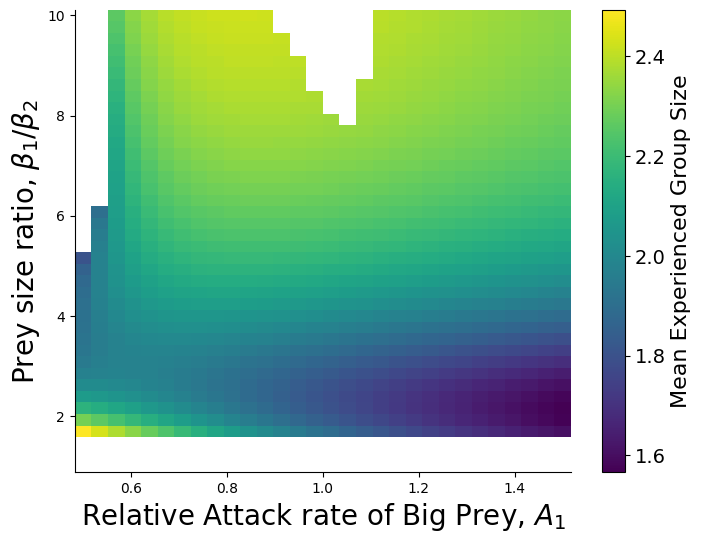

In [96]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the grid
A1_grid, scale_grid = np.meshgrid(A1_values, scale_values)

# Plot the heatmap
c = ax.pcolormesh(A1_grid, scale_grid, heatmap_data, shading='auto', cmap='viridis')

# Add colorbar
cbar = fig.colorbar(c, ax=ax)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Mean Experienced Group Size', fontsize=16)

# Labels and title
format_ax(ax = ax, xlab = param_lab_dic['A1'], ylab = param_lab_dic['scale'])


# Show the plot
plt.show()

In [140]:
def plot_heatmap_value_at_coexistence(y_col_name, df, include_unstable = True, if_diverge_cmap = True,
                                      colormin = -2, colormax = 2, colorcenter = 0):
    '''
    Plots the heatmap of a value, specified by y_col_name, from the dataframe df
    Assumes varying parameters A1, scale for the following base parameter dictionary:
    params_base = dict(η1 = 0.2, η2 = 0.6, A1 = 0.6, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H1b=1, H2a = 0, H2b = 1, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = 5, d = 10,
                 Tx = .01, pop_process = True, scale = 6)
    params:
    - y_col_name: the value being plotted, such as mean_x
    - df: points to the dataframe
    - include_unstable: whether to plot unstable coexistence equilibria if no extinction equilibria are stable
    - colormin, colormax giv the min, max of what is colored in the gradient (everything past those extremes are colored the same)
    - colorcenter gives the center of the diverging color gradient
    '''
    heatmap_data = get_value_at_coexistence(y_col_name, df, include_unstable)

    fig, ax = plt.subplots(figsize=(8, 6))

    # Define the grid
    A1_grid, scale_grid = np.meshgrid(A1_values, scale_values)
    if if_diverge_cmap:
        # define a diverging colormap
        divnorm = mcolors.TwoSlopeNorm(vmin=np.nanmin(colormin), vmax=np.nanmax(colormax), vcenter=colorcenter) 
        # ^shades everything less than vmin same color, greater than vmax same color
        
        # Plot the heatmap
        c = ax.pcolormesh(A1_grid, scale_grid, heatmap_data, shading='auto', cmap='coolwarm', norm=divnorm)
    else:
        c = ax.pcolormesh(A1_grid, scale_grid, heatmap_data, shading='auto', cmap='viridis')
    
    # Add colorbar
    cbar = fig.colorbar(c, ax=ax)
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.tick_params(labelsize=14)
    cbarlabdic = dict(apparent_competition1=r'$\partial N_2/\partial N_1$', 
                      apparent_competition2 = r'$\partial N_1/\partial N_2$',
                      mean_x = mean_x_lab,
                     p = "Pred. Pop. Density, p")
    cbar.set_label(cbarlabdic[y_col_name], fontsize=16)
    
    # Labels and title
    format_ax(ax = ax, xlab = param_lab_dic['A1'], ylab = param_lab_dic['scale'])
    
    
    return fig

## Predator Population Density

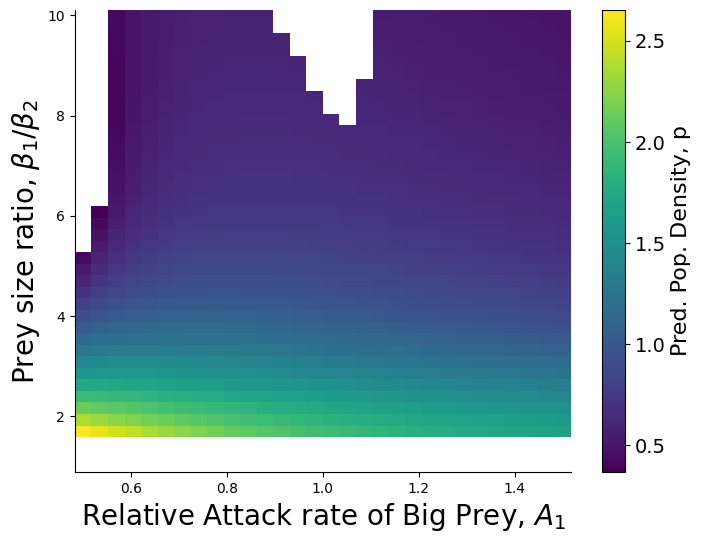

In [142]:
fig = plot_heatmap_value_at_coexistence('p', df, include_unstable = True, if_diverge_cmap = False)

## Mean experienced group size

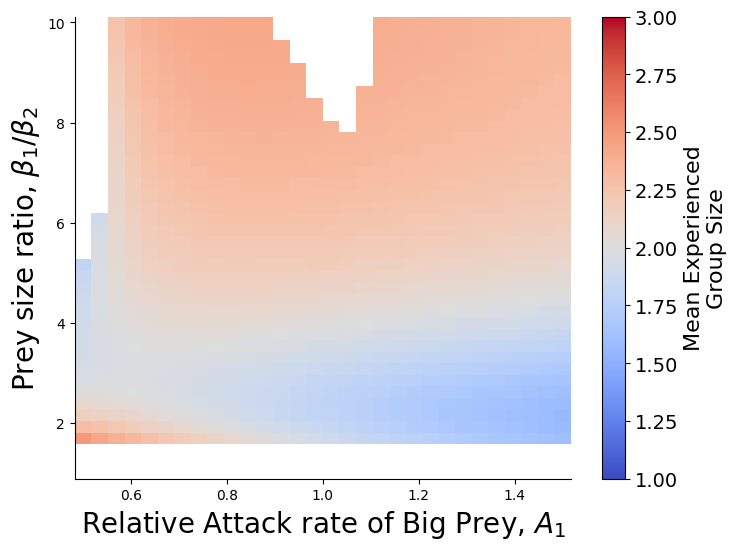

In [136]:
fig = plot_heatmap_value_at_coexistence('mean_x', df, include_unstable = True, 
                                      colormin = 1, colormax = 3, colorcenter = 2)

## Apparent Competition of Big Prey ON Small Prey

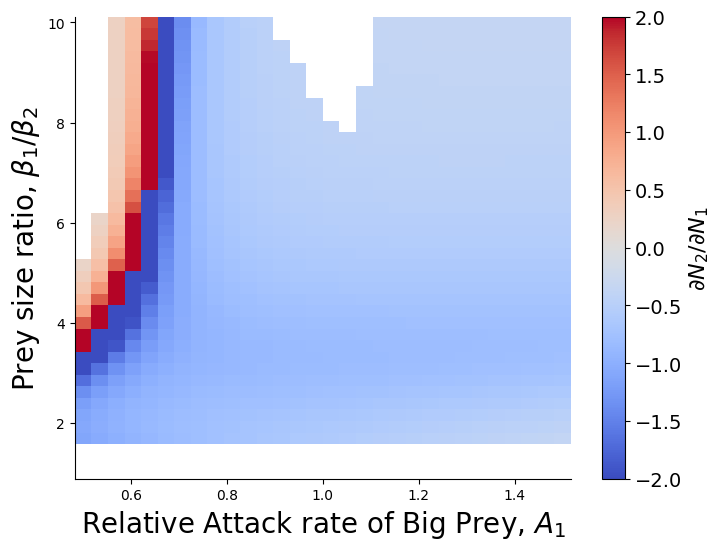

In [121]:
fig = plot_heatmap_value_at_coexistence('apparent_competition1', df, include_unstable = True, 
                                      colormin = -2, colormax = 2, colorcenter = 0)

## Apparent competition of small prey on big prey:

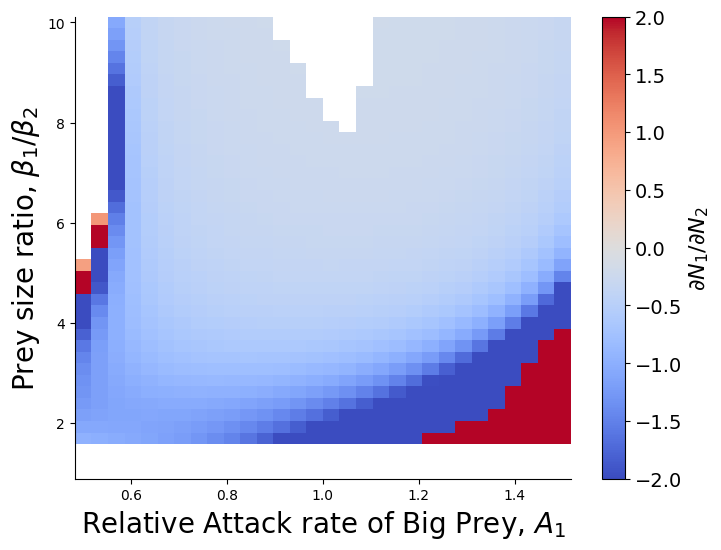

In [122]:
fig = plot_heatmap_value_at_coexistence('apparent_competition2', df, include_unstable = True, 
                                      colormin = -2, colormax = 2, colorcenter = 0)